### Visualizing Chipotle's Data
* [데이터셋 출처](https://github.com/justmarkham)

In [2]:
# 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# 출력창에서 plt 보기
%matplotlib inline

In [3]:
# 데이터 불러오기
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
print(chipo.shape)
chipo.head()

(4622, 5)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# 처음 10개 데이터 보기
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


카운터로 집계한 데이터: Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barba

,counts
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27


--------------------------------------------------


,counts
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


--------------------------------------------------


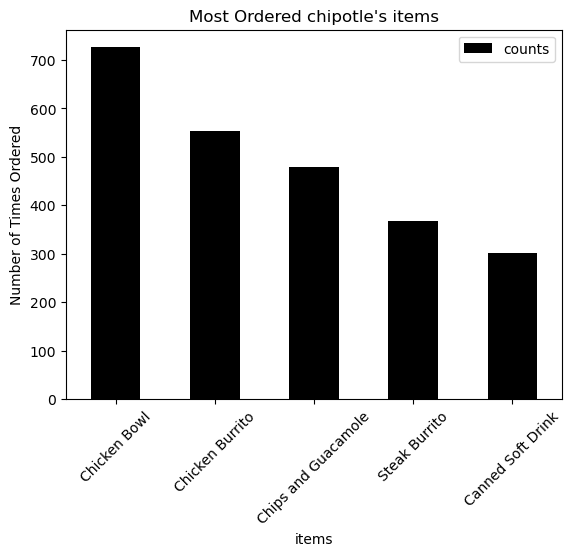

In [51]:
# 가장 많이 팔린 상위 5개 아이템에 대한 히스토그램 그리기

# Counter를 이용해서 개수 세기
letter_counts = Counter(chipo.item_name)
print(f"카운터로 집계한 데이터: {letter_counts}")
print('-'*50)

# letter_counter를 df로 만들기
# from_dict > 딕셔너리로 df 만들기
# orient > 행으로 들어갈 내용이 key 값이라면 index 
df = pd.DataFrame.from_dict(letter_counts, orient='index', columns=['counts'])
display(df.head(3))
print('-'*50)

# sorting 해서 상위 5개만 뽑기
df5 = df.sort_values(by='counts', ascending=False)[:5]
display(df5)
print('-'*50)

# plot 만들기
df5.plot(kind='bar', color='k')
# plot 세부설정
plt.xlabel('items')
plt.xticks(rotation=45)
plt.ylabel('Number of Times Ordered')
plt.title("Most Ordered chipotle's items")

plt.show()

In [65]:
# 산점도 그리기
# order_id 기준으로 그룹핑하고 quantity와 order_price 의 관계 그리기

# order_price 열을 숫자로 바꾸기
chipo['item_f_price'] = chipo.item_price.apply(lambda x: float(x[1:]))
# 그룹핑
chipo_scatter_df = chipo.groupby('order_id').sum()


### 진행중~~


# plot 만들기
# plt.scatter(x=chipo_scatter_df.)

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_f_price, Length: 1834, dtype: float64